# CS207 Group 9 Presentation - Visualization Module

Our module aims to provide helpful functions for visualization. It allows to easily create plots and graphs of meaningful quantities related to a set of reactions given as an xml file. We plot elements such as evolution curves of concentrations, 2D graphs of species relationships and animated gifs of the graphs.

## Intallation

In [4]:
%%bash
cd /Users/gwungwun/Movies
git clone https://github.com/cs207group9/cs207-FinalProject.git
cd cs207-FinalProject
python setup.py install

running install
running bdist_egg
running egg_info
writing chemkin_CS207_G9.egg-info/PKG-INFO
writing dependency_links to chemkin_CS207_G9.egg-info/dependency_links.txt
writing top-level names to chemkin_CS207_G9.egg-info/top_level.txt
reading manifest file 'chemkin_CS207_G9.egg-info/SOURCES.txt'
writing manifest file 'chemkin_CS207_G9.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.7-x86_64/egg
running install_lib
running build_py
copying test/test_ode_solver.py -> build/lib/test
copying test/test_RSGraph.py -> build/lib/test
copying test/test_NonNetworkPlot.py -> build/lib/test
creating build/lib/chemkin_CS207_G9/reaction
copying chemkin_CS207_G9/reaction/ReactionSystem.py -> build/lib/chemkin_CS207_G9/reaction
copying chemkin_CS207_G9/reaction/__init__.py -> build/lib/chemkin_CS207_G9/reaction
copying chemkin_CS207_G9/reaction/CoeffLaw.py -> build/lib/chemkin_CS207_G9/reaction
copying chemkin_CS207_G9/reaction/Reaction.py -> build/lib/chemkin_CS207_G9/reaction

Cloning into 'cs207-FinalProject'...


## Path to the Example Data

In [1]:
import os
import chemkin_CS207_G9

BASE_DIR = os.path.dirname(os.path.abspath(chemkin_CS207_G9.__file__))
path_xml = os.path.join(BASE_DIR, 'data/rxns_reversible.xml')
path_sql = os.path.join(BASE_DIR, 'data/nasa_thermo_all.sqlite')

----

## Reaction Systems

### `Reaction`

In [2]:
from chemkin_CS207_G9.reaction.Reaction import Reaction

reaction1 = Reaction(
    reactants={'H2':2,'O2':1}, products = {'OH':2,'H2':1}, 
    coeffLaw = 'Constant', coeffParams = {'k':10}, 
    reversible='no')
reaction2 = Reaction(
    reactants={'OH':1,'HO2':1}, products = {'H2O':1,'O2':1}, 
    coeffLaw = 'Arrhenius', coeffParams = {'A':5, 'E':-10}, 
    reversible='yes')

reactions = [reaction1, reaction2]

### `ReactionSystem`

In [3]:
from chemkin_CS207_G9.reaction.ReactionSystem import ReactionSystem
from chemkin_CS207_G9.parser.database_query import CoeffQuery

species = ['H2', 'O2', 'OH', 'HO2', 'H2O']
concentrations = {'H2':1, 'O2':2, 'OH':2, 'HO2':1, 'H2O':1}

nasa_query = CoeffQuery(path_sql)
temperature = 300

reac_sys = ReactionSystem(
    reactions, species, nasa_query, temperature, concentrations)

print(reac_sys)

ReactionSystem object with following Reactions: 

Reaction 0: 
Reaction Equation:
2H2 + 1O2 =] 1H2 + 2OH
----------------------------------------
Reaction Info:
ID: reaction
TYPE: Elementary
reversible: False
coeffLaw: Constant
coeffParams: [('k', 10)]
coeffUnits: []

Reaction 1: 
Reaction Equation:
1HO2 + 1OH [=] 1H2O + 1O2
----------------------------------------
Reaction Info:
ID: reaction
TYPE: Elementary
reversible: True
coeffLaw: Arrhenius
coeffParams: [('A', 5), ('E', -10), ('R', 8.314)]
coeffUnits: []



In [4]:
# nu matrix of stoich coeffs
reac_sys.get_nu_2() - reac_sys.get_nu_1()

array([[-1.,  0.],
       [-1.,  1.],
       [ 2., -1.],
       [ 0., -1.],
       [ 0.,  1.]])

In [5]:
# nasa coeffs of species
reac_sys.get_a()

array([[  2.34433112e+00,   7.98052075e-03,  -1.94781510e-05,
          2.01572094e-08,  -7.37611761e-12,  -9.17935173e+02,
          6.83010238e-01],
       [  3.78245636e+00,  -2.99673416e-03,   9.84730201e-06,
         -9.68129509e-09,   3.24372837e-12,  -1.06394356e+03,
          3.65767573e+00],
       [  3.99201543e+00,  -2.40131752e-03,   4.61793841e-06,
         -3.88113333e-09,   1.36411470e-12,   3.61508056e+03,
         -1.03925458e-01],
       [  4.30179801e+00,  -4.74912051e-03,   2.11582891e-05,
         -2.42763894e-08,   9.29225124e-12,   2.94808040e+02,
          3.71666245e+00],
       [  4.19864056e+00,  -2.03643410e-03,   6.52040211e-06,
         -5.48797062e-09,   1.77197817e-12,  -3.02937267e+04,
         -8.49032208e-01]])

In [6]:
# forward coeff, backward coeff, for each reaction
reac_sys.get_reac_rate_coefs()

(array([ 10.        ,   5.02008675]),
 array([  1.11791588e+13,   3.51069689e-50]))

In [7]:
# reaction rate, for each species
reac_sys.get_reac_rate()

array([-20.       ,  -9.9598265,  29.9598265, -10.0401735,  10.0401735])

### A Simpler Approach

In [8]:
import os
import chemkin_CS207_G9
from chemkin_CS207_G9.parser.Reaction_Creator import Reaction_Creator

BASE_DIR = os.path.dirname(os.path.abspath(chemkin_CS207_G9.__file__))
path_xml = os.path.join(BASE_DIR, 'data/rxns_reversible.xml')
path_sql = os.path.join(BASE_DIR, 'data/nasa_thermo_all.sqlite')

reac_sys = Reaction_Creator(path_xml, path_sql)

temperature = 3000
concentrations = dict(H=2, O=1, OH=0.5, H2=1, H2O=1, O2=1, HO2=0.5, H2O2=1)
reac_sys.set_temp(temperature)
reac_sys.set_concs(concentrations)

In [9]:
reac_sys.get_species()

['H', 'O', 'OH', 'H2', 'H2O', 'O2', 'HO2', 'H2O2']

In [10]:
reac_sys.get_nu_2() - reac_sys.get_nu_1()

array([[-1.,  1.,  1.,  0., -1., -1.,  0.,  0., -1., -1.,  0.],
       [ 1., -1.,  0., -1.,  0.,  0., -1.,  0.,  0.,  0., -1.],
       [ 1.,  1., -1.,  2.,  0.,  2.,  1., -1.,  1.,  0.,  1.],
       [ 0., -1., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1., -1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -1.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1.]])

In [11]:
reac_sys.get_reac_rate()

array([ -2.71825807e+14,  -2.93984058e+13,   4.16600598e+14,
         6.16540153e+13,   3.31413904e+13,  -5.94407714e+13,
         3.29035629e+13,  -1.83634583e+14])

### It's ALIVE !!!

In [12]:
reac_sys.evolute(1e-14, method='SIE') # alternative method (scipy): LSODA, Radau, BDF
reac_sys.get_concs()

{'H': 1.1626367750443365,
 'H2': 1.1000177672547196,
 'H2O': 1.7798275550921767,
 'H2O2': 0.23972297878918311,
 'HO2': 0.29943657727829848,
 'O': 0.89607331490450415,
 'O2': 1.2234949862315745,
 'OH': 1.298790045405209}

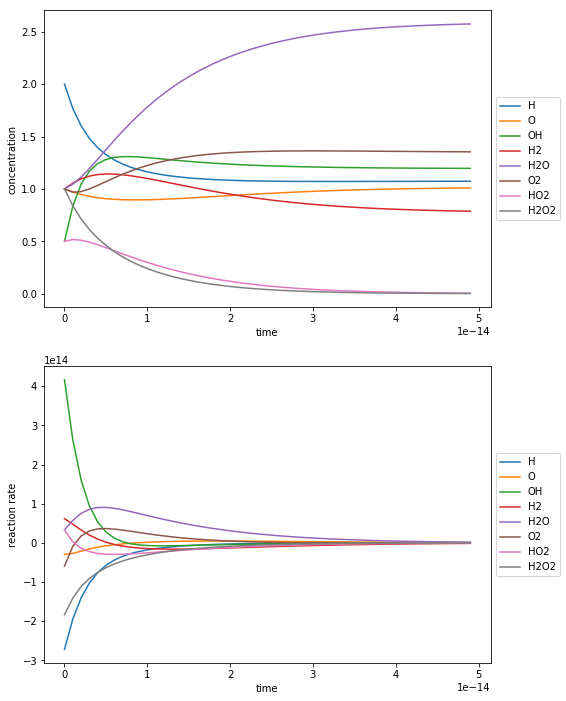

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from chemkin_CS207_G9.plotting.NonNetworkPlot import plot_concentration
from chemkin_CS207_G9.plotting.NonNetworkPlot import plot_reaction_rate

reac_sys.set_concs(concentrations)
time_grid = np.arange(0, 5e-14, 1e-15)

fig, axes = plt.subplots(2, 1, figsize=(8,12))
plot_concentration(reac_sys, time_grid, ax=axes[0])
                   #species=['H','O'], linestyle='dashed', alpha=0.7)
plot_reaction_rate(reac_sys, time_grid, ax=axes[1])
plt.show()

### Interlude: get some intuition to your coefficient law

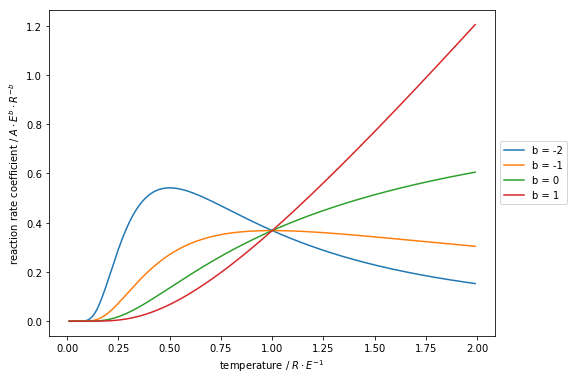

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from chemkin_CS207_G9.plotting.NonNetworkPlot import plot_modified_arrhenius

fig, ax = plt.subplots(figsize=(8,6))
plot_modified_arrhenius(
    RToE_grid=np.arange(0.01,2,0.01), 
    b_grid=np.arange(-2,2,1),
    ax=ax)
plt.show()


---
##  Network Visualization

### Bipartite Graph

In [15]:
import imageio
imageio.plugins.ffmpeg.download()
from chemkin_CS207_G9.plotting.RSGraph import BipartiteRSGraph, HierarchicalRSGraph

import graphviz
from graphviz import Digraph

In [16]:
rs1 = Reaction_Creator(path_xml, path_sql, start = 0, end = 2)
rs2 = Reaction_Creator(path_xml, path_sql)
rs3 = Reaction_Creator(path_xml, path_sql, start = 0, end = 7)

In [17]:
dot_b = BipartiteRSGraph(rs1)

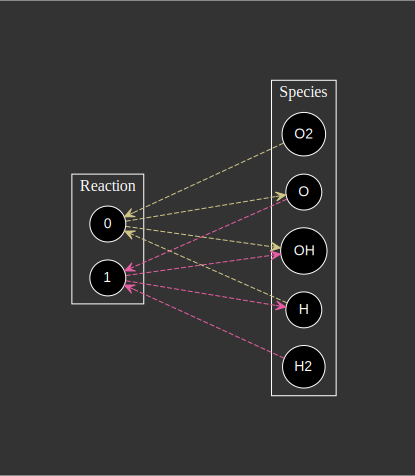

In [18]:
dot_b.plot_system()

0: H + O2 = O + OH

1: O + H2 = H + OH

### Change style of the graph

In [19]:
new_style = {
        'graph': {
            'fontsize': '16',
            'fontcolor': 'red',
            'bgcolor': '#333333',
            'rankdir': 'BT',
            'pad':'1'
        },
        'nodes': {
            'fontname': 'Courier',
            'shape': 'circle',
            'fontcolor': 'red',
            'color': 'white',
            'style': 'dashed',
            'fillcolor': 'black',
        },
        'edges': {
            'style': 'dashed',
            'color': 'red',
            'arrowhead': 'empty',
            'fontname': 'Courier',
            'fontsize': '12',
            'fontcolor': 'white',
        }
    }
    
dot_b.modify_current_style(new_style)

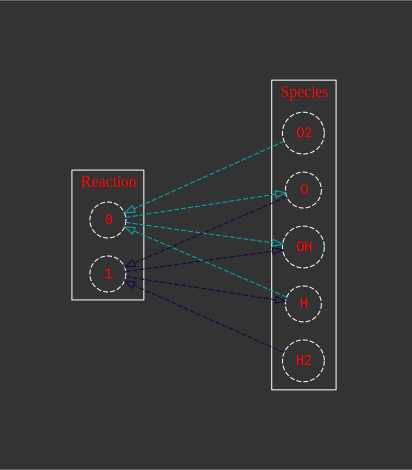

In [20]:
dot_b.plot_system()

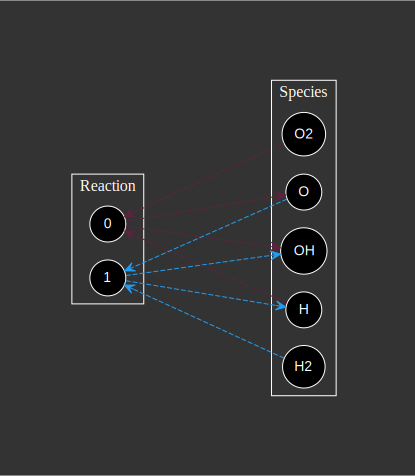

In [21]:
dot_b.reset_default_style()
dot_b.plot_system()

### Hierarchical Graph

In [22]:
dot_h = HierarchicalRSGraph(rs1)

#### plot the whole reaction system

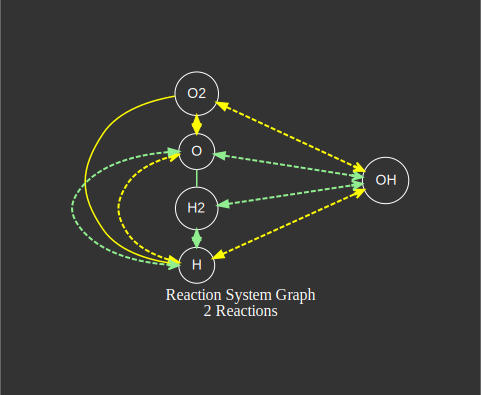

In [23]:
dot_h.plot_system(colors = ['yellow', 'lightgreen'])

#### Plot a more complex reaction system

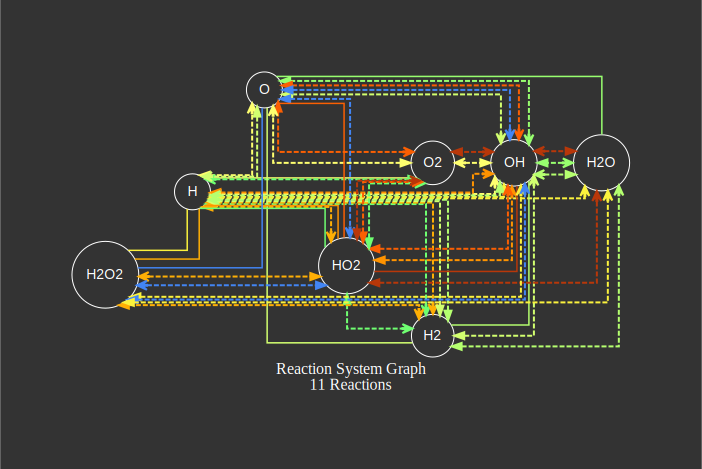

In [24]:
dot_h_3 = HierarchicalRSGraph(rs2)
dot_h_3.plot_system()

#### Plot each reaction equation seperately

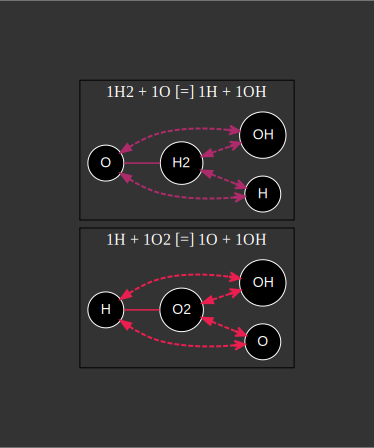

In [25]:
dot_h.plot_reactions()

#### plot specific reactions

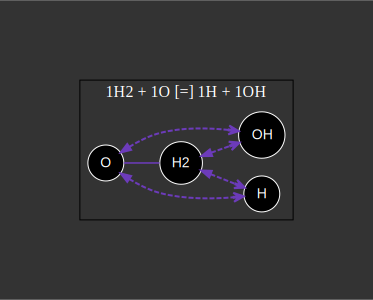

In [26]:
dot_h.plot_reactions(idxs=[1])

### Animated Gifs

In [63]:
import random
sp = rs3.get_species()
concentrations = {s:random.random()*2 for s in sp}
rs3.set_temp(random.randint(1000,3000))
rs3.set_concs(concentrations, initial=True)
h_graph = HierarchicalRSGraph(rs3)
h_graph.save_evolution_movie(solver_step_size = 3e-16, timesteps = 30, path = 'RSGif')


[MoviePy] Building file RSGif.gif with imageio


100%|██████████| 91/91 [00:12<00:00,  7.57it/s]


Animated Gifs for full reaction system:

<img src="Nice Gifs\RSGif-2.gif" width="600" height="500" /> 

| <img src="Nice Gifs\RSGif-0.gif" width="400" height="500" /> |  <img src="Nice Gifs\RSGif-7.gif" width="400" height="500" /> | 
|--------------------------------------------------------------|--------------------------------------------------------------|

| <img src="Nice Gifs\RSGif-4.gif" width="500" height="500" /> | <img src="Nice Gifs\RSGif-8.gif" width="500" height="500"/> |
|--------------------------------------------------------------|--------------------------------------------------------------|

<img src="Nice Gifs\RSGif-22.gif" width="800" height="400" />
<img src="Nice Gifs\RSGif-9.gif" width="800" height="400" />


$$$$
$$$$
Animated Gifs with Reactions in clusters:

<img src="Nice Gifs\ReacGif-3-F.gif" width="700" height="600" />
<img src="Nice Gifs\ReacGif-5.gif" width="700" height="500" />
<img src="Nice Gifs\ReacGif-6.gif" width="700" height="800" />
